# 1 Read top five values

In [1]:
import pandas as pd

df = pd.read_csv("car_sales.csv")
print(df.head())

    Manufacturer              Model  Sales in thousands 4-year resale value  \
0  Acura          Integra                        16.919               16.36   
1  Acura          TL                             39.384              19.875   
2  Acura          CL                             14.114              18.225   
3  Acura          RL                              8.588              29.725   
4  Audi           A4                             20.397              22.255   

  Vehicle type Price in thousands Engine size Horsepower Wheelbase Width  \
0    Passenger               21.5         1.8        140     101.2  67.3   
1    Passenger               28.4         3.2        225     108.1  70.3   
2    Passenger                  .         3.2        225     106.9  70.6   
3    Passenger                 42         3.5        210     114.6  71.4   
4    Passenger              23.99         1.8        150     102.6  68.2   

  Length Curb weight Fuel capacity Fuel efficiency Latest Launch  
0

# Print dataframe info_data types of each column

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

# 3. Print number of rows and columns

In [3]:
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 157, Number of columns: 15


# 4. Drop duplicate rows_if any

In [4]:
df = df.drop_duplicates()

# 5. Print number of rows and columns after dropping duplicates

In [5]:
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 157, Number of columns: 15


# 6. Print summary statistics for numerical variables

In [6]:
print(df.describe())

       Sales in thousands
count          157.000000
mean            52.998076
std             68.029422
min              0.110000
25%             14.114000
50%             29.450000
75%             67.956000
max            540.561000


# 7. Print number of missing values in each column

In [7]:
print(df.isnull().sum())

Manufacturer           0
Model                  0
Sales in thousands     0
4-year resale value    0
Vehicle type           0
Price in thousands     0
Engine size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb weight            0
Fuel capacity          0
Fuel efficiency        0
Latest Launch          0
dtype: int64


# 8. Drop the column with most missing values

In [8]:
most_missing_column = df.isnull().sum().idxmax()
df.drop(columns=[most_missing_column], inplace=True)
print(f"Dropped column with most missing values: {most_missing_column}")

Dropped column with most missing values: Manufacturer


# 9. Drop the rows with categorical missing values

In [9]:
df_cleaned = df.drop_duplicates()
print("Number of rows before removing duplicates:", df.shape[0])
print("Number of rows after removing duplicates:",
df_cleaned.shape[0])

Number of rows before removing duplicates: 157
Number of rows after removing duplicates: 157


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns
df.dropna(subset=categorical_columns, inplace=True)
print("Dropped rows with missing categorical values.")

Dropped rows with missing categorical values.


# 10. Import the rows with numerical missing values

In [12]:
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
print("Imputed missing numerical values with mean.")

Imputed missing numerical values with mean.


# 11. Sort the data w.r.t price_find the details of the most and the least expensive cars

In [14]:
if "Price in thousands" in df.columns:
    df_sorted = df.sort_values(by="Price in thousands", ascending=True)
    print("Details of the Least Expensive Car:")
    print(df_sorted.iloc[0])

    print("\nDetails of the Most Expensive Car:")
    print(df_sorted.iloc[-1])
else:
    print("'Price' column not found in the dataset.")


Details of the Least Expensive Car:
Manufacturer               Acura        
Model                  CL               
Sales in thousands                14.114
4-year resale value               18.225
Vehicle type                   Passenger
Price in thousands                     .
Engine size                          3.2
Horsepower                           225
Wheelbase                          106.9
Width                               70.6
Length                               192
Curb weight                         3.47
Fuel capacity                       17.2
Fuel efficiency                       26
Latest Launch                   1-Apr-14
Name: 2, dtype: object

Details of the Most Expensive Car:
Manufacturer               Hyundai      
Model                  Accent           
Sales in thousands                41.184
4-year resale value                 5.86
Vehicle type                   Passenger
Price in thousands                 9.699
Engine size                          1.5
Hor

# 12. Write a function to find min and max values of any column

In [6]:
import pandas as pd

df = pd.read_csv("car_sales.csv")
def find_min_max(df, column_name):
    min_value = df[column_name].min()
    max_value = df[column_name].max()
    min_row = df[df[column_name] == min_value]
    max_row = df[df[column_name] == max_value]
    return min_value, max_value, min_row, max_row

# 13. Call the above function to find min max of horse power, length, fuel efficiency

In [5]:
import pandas as pd

df = pd.read_csv("car_sales.csv")
for col in ["Horsepower", "Length", "FuelEfficiency"]:
    if col in df.columns:
        min_val, max_val, min_row, max_row = find_min_max(df, col)
        print(f"{col} - Min: {min_val}, Max: {max_val}")
    else:
        print(f"Column '{col}' not found in dataset.")

Horsepower - Min: ., Max: 92
Length - Min: ., Max: 224.5
Column 'FuelEfficiency' not found in dataset.


# 14. Plot histogram of continuous numerical variable :price,sales,hoursepower,fuelefficiency

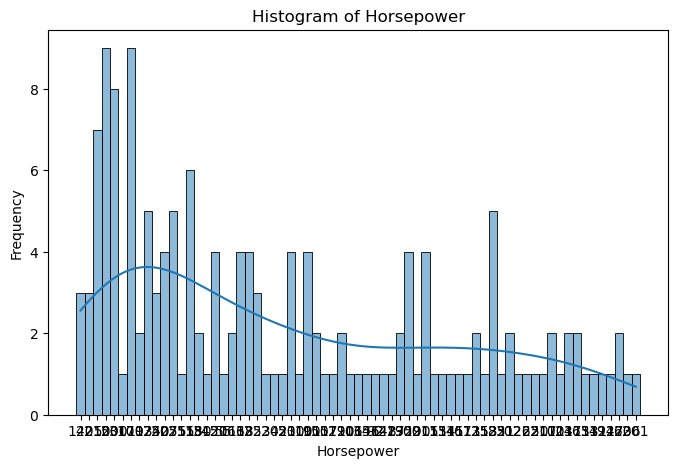

In [7]:
import pandas as pd

df = pd.read_csv("car_sales.csv")
import seaborn as sns
import matplotlib.pyplot as plt

continuous_vars = ["Price", "Sales", "Horsepower", "FuelEfficiency"]
for var in continuous_vars:
    if var in df.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[var], bins=30, kde=True)
        plt.title(f"Histogram of {var}")
        plt.xlabel(var)
        plt.ylabel("Frequency")
        plt.show()

# 15. Probability density distribution of continuous numerical variable-length

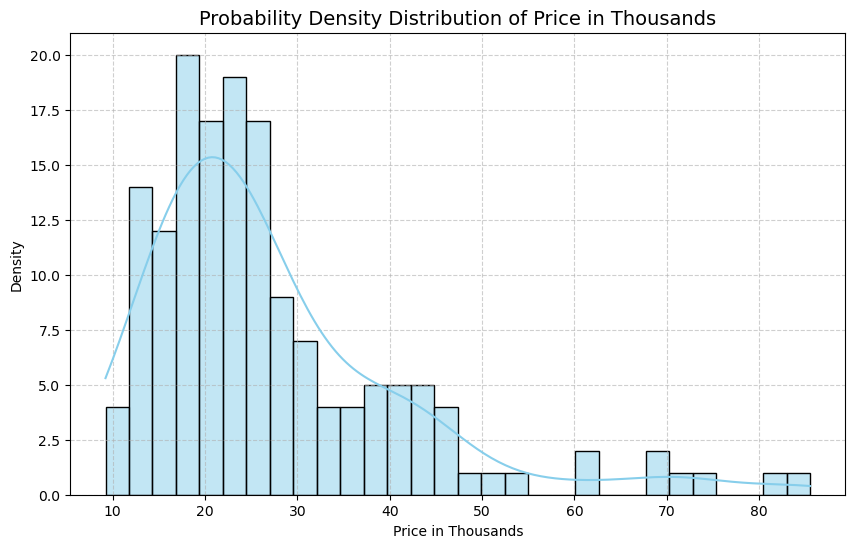

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["Price in thousands"], kde=True, color="skyblue", bins=30)
plt.title("Probability Density Distribution of Price in Thousands", fontsize=14)
plt.xlabel("Price in Thousands")
plt.ylabel("Density")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 16. Count by category –group by manufacture

In [19]:
import pandas as pd

df = pd.read_csv("car_sales.csv")
import seaborn as sns
import matplotlib.pyplot as plt
if "Manufacturer" in df.columns:
    manufacturer_counts = df.groupby("Manufacturer").size().reset_index(name="Count")
    print("Car Count by Manufacturer:")
    print(manufacturer_counts)
else:
    print("'Manufacturer' column not found in dataset.")


Car Count by Manufacturer:
     Manufacturer  Count
0   Acura              4
1   Audi               3
2   BMW                3
3   Buick              4
4   Cadillac           5
5   Chevrolet          9
6   Chrysler           7
7   Dodge             11
8   Ford              11
9   Honda              5
10  Hyundai            3
11  Infiniti           1
12  Jaguar             1
13  Jeep               3
14  Lexus              6
15  Lincoln            3
16  Mercedes-Benz      9
17  Mercury            6
18  Mitsubishi         7
19  Nissan             7
20  Oldsmobile         6
21  Plymouth           4
22  Pontiac            6
23  Porsche            3
24  Saab               2
25  Saturn             5
26  Subaru             2
27  Toyota             9
28  Volkswagen         6
29  Volvo              6


# 17. Select all numerical variables 

In [6]:
numerical_columns = df.select_dtypes(include=['number']).columns
print("Numerical Variables:")
print(numerical_columns)

Numerical Variables:
Index(['Sales in thousands', '4-year resale value', 'Price in thousands',
       'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb weight', 'Fuel capacity', 'Fuel efficiency'],
      dtype='object')


# 18. Print correlation coefficient value of price and sales

In [7]:
correlation = df["Price in thousands"].corr(df["Sales in thousands"])
print("Correlation Coefficient (Price vs. Sales):", correlation)

Correlation Coefficient (Price vs. Sales): -0.3030490929567089


19. Plot correlation of price and sales using scatterplot

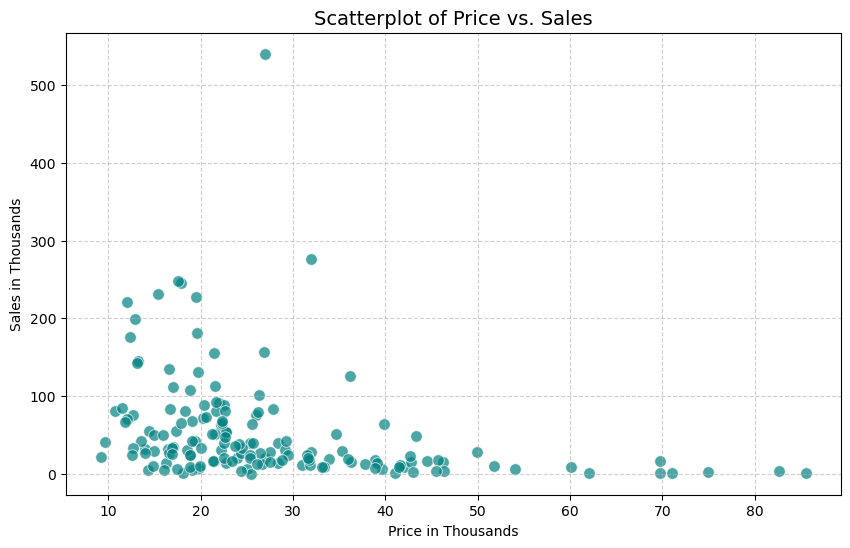

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Price in thousands"], y=df["Sales in thousands"], color="teal", s=70, alpha=0.7)
plt.title("Scatterplot of Price vs. Sales", fontsize=14)
plt.xlabel("Price in Thousands")
plt.ylabel("Sales in Thousands")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 20.Pair plot

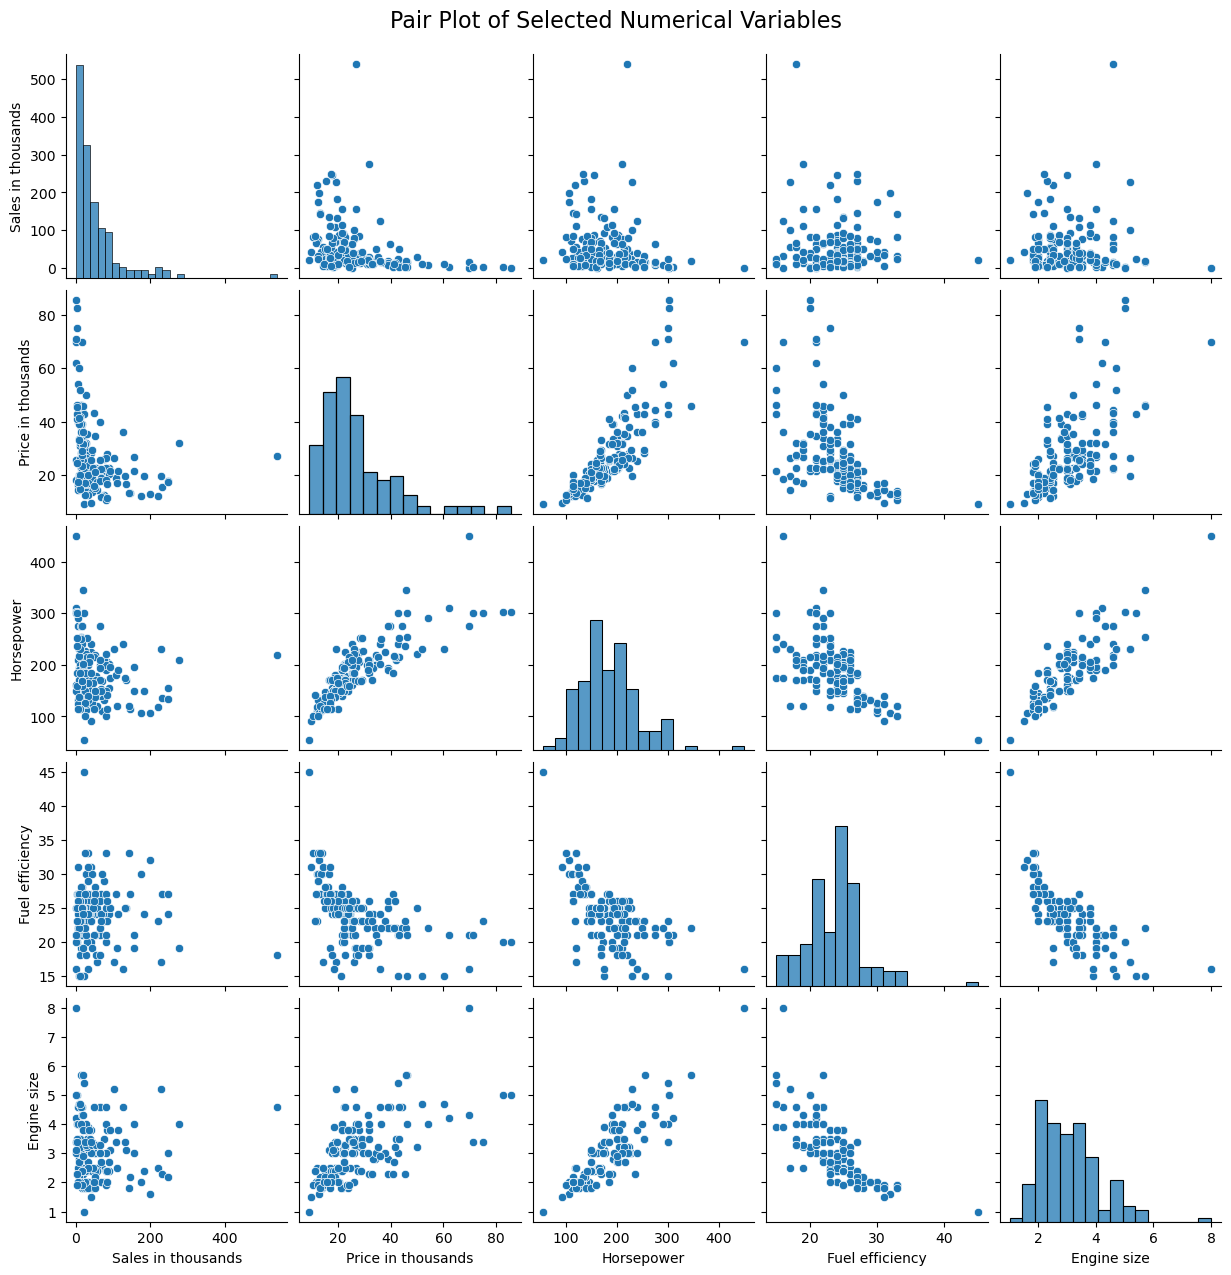

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns = ["Sales in thousands", "Price in thousands", "Horsepower", "Fuel efficiency", "Engine size"]
sns.pairplot(df[selected_columns])
plt.suptitle("Pair Plot of Selected Numerical Variables", fontsize=16, y=1.02)
plt.show()

# 21. Boxplot of sales of different manufacturer

/tmp/ipykernel_4139/62343846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Sales in thousands", y="Manufacturer", data=df, palette="Set2")


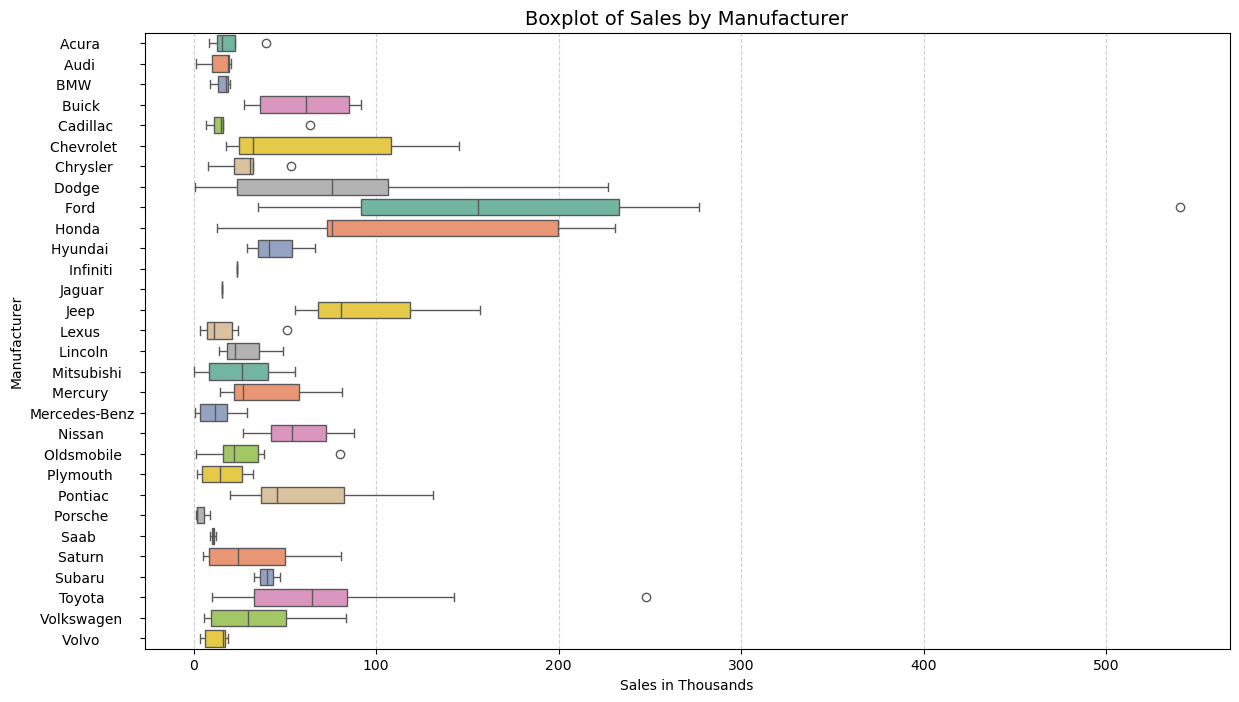

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="Sales in thousands", y="Manufacturer", data=df, palette="Set2")
plt.title("Boxplot of Sales by Manufacturer", fontsize=14)
plt.xlabel("Sales in Thousands")
plt.ylabel("Manufacturer")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.show()

# 22. Boxplot of other numerical variables w.r.t manufacture

/tmp/ipykernel_4139/3747462951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Price in thousands", y="Manufacturer", data=df, ax=axes[0], palette="coolwarm")
/tmp/ipykernel_4139/3747462951.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Horsepower", y="Manufacturer", data=df, ax=axes[1], palette="viridis")


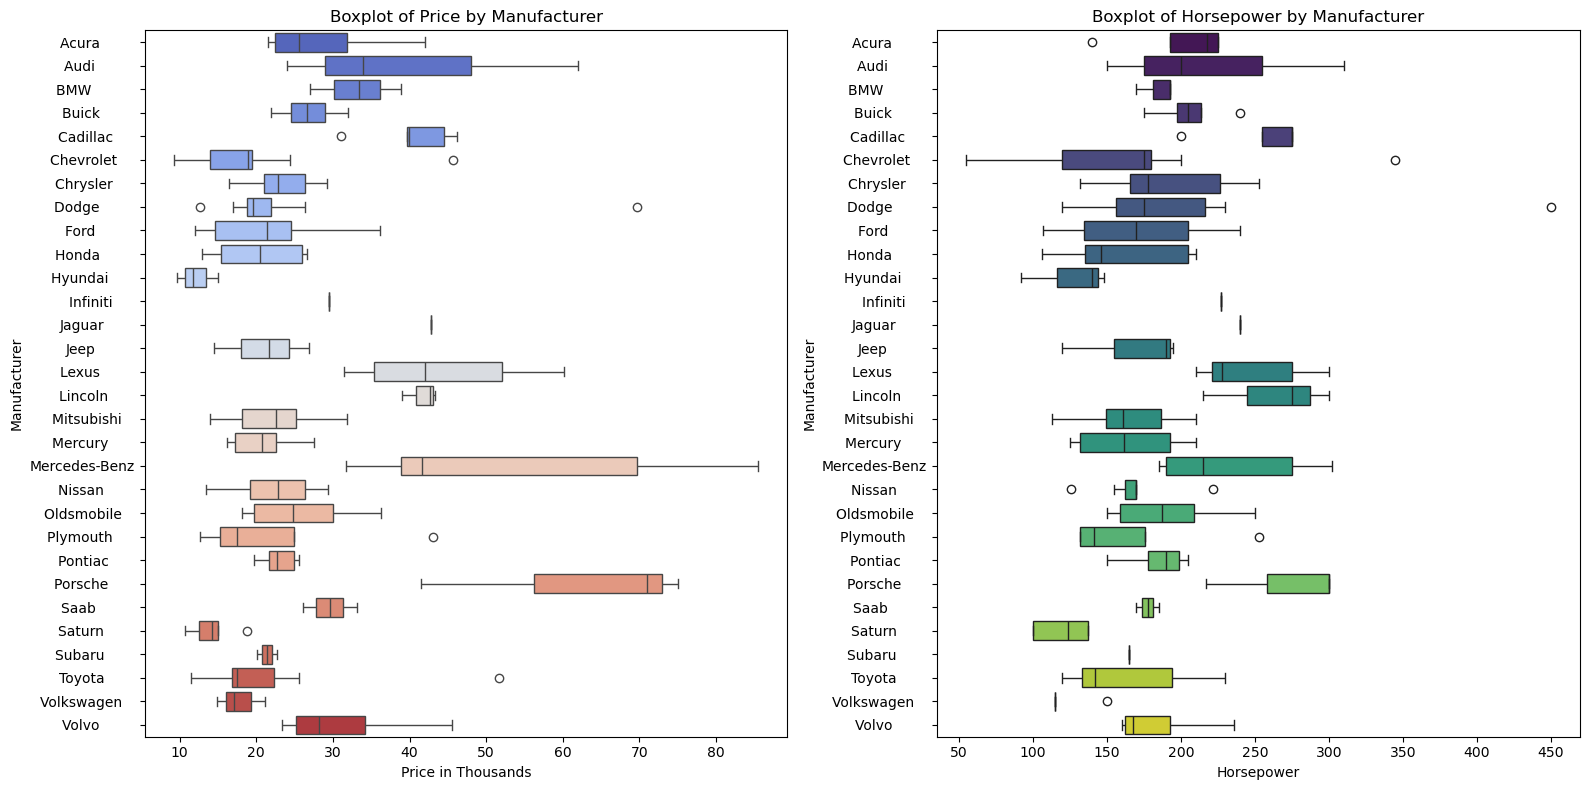

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.boxplot(x="Price in thousands", y="Manufacturer", data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Boxplot of Price by Manufacturer", fontsize=12)
axes[0].set_xlabel("Price in Thousands")

sns.boxplot(x="Horsepower", y="Manufacturer", data=df, ax=axes[1], palette="viridis")
axes[1].set_title("Boxplot of Horsepower by Manufacturer", fontsize=12)
axes[1].set_xlabel("Horsepower")

plt.tight_layout()
plt.show()


# 23 Output variable: y = Sales in thousands

In [14]:
y = df["Sales in thousands"]

# Input variables: All other variables except "Sales in thousands"
X = df.drop(columns=["Sales in thousands"])
print("Input shape:", X.shape)
print("Output shape:", y.shape)


Input shape: (157, 14)
Output shape: (157,)


# 24. Encode Other Categorical Variables Using Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["Manufacturer", "Model"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X[categorical_cols].head()


,Manufacturer,Model
0,0,79
1,0,143
2,0,25
3,0,115
4,1,8


# 26.Split the data set into train and test set 70% train set 10% test set 

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (141, 14)
Test set shape: (16, 14)


# 27 Apply scaling only to numerical columns

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include='number').columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train.head()


,Manufacturer,Model,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
125,0.978395,-0.988791,5.247184,Passenger,3.500481,0.374212,2.176324,-2.060696,-0.449270,-0.975456,-0.537128,-0.235457,-0.663407,21-Dec-14
108,0.630027,-0.655198,-0.593637,Passenger,-0.636605,0.078892,-0.599616,-0.052519,-0.478416,0.374632,-0.426849,-0.694082,0.265034,31-May-15
155,1.675131,-1.211186,-0.245920,Passenger,1.503726,-0.708628,0.991923,-0.345378,0.133634,-0.111399,0.359285,0.146731,-0.199187,26-Apr-15
65,-0.415077,-0.032492,0.405754,Passenger,0.249103,-0.019548,0.825366,0.128775,-0.245254,0.505784,-0.048749,0.146731,0.265034,15-Apr-14
119,0.862273,-0.121450,-0.705995,Passenger,-0.513373,0.374212,-0.136959,-0.052519,-0.186963,-0.065111,-0.444179,-0.694082,0.265034,26-Nov-14
